<ipython-input-1-5610c4e53ac0>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column] = label_encoders[column].fit_transform(X_train[column])
<ipython-input-1-5610c4e53ac0>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[column] = label_encoders[column].fit_transform(X_test[column])


Mean Squared Error: 312.5426936014286
R^2 Score: 0.5173426575045997


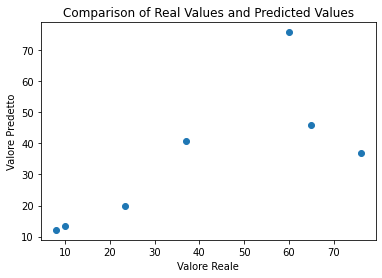

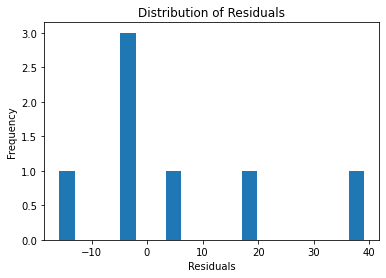

   club_name   age  player_name  position  club_involved_name  season  \
0          0  30.0            5         0                   2    2020   
1          3  25.0            3         3                   2    2019   
2          2  28.0            1         3                   3    2019   
3          2  24.0            0         2                   0    2020   
4          1  20.0            4         0                   2    2020   
5          1  19.0            2         1                   2    2020   
6          2  19.0            6         2                   1    2020   

   Valore Reale  Valore Predetto  Differenza  
0          60.0          75.7765     15.7765  
1          65.0          46.0012    -18.9988  
2          37.0          40.9225      3.9225  
3          76.0          36.9879    -39.0121  
4          10.0          13.3431      3.3431  
5           8.0          12.1650      4.1650  
6          23.3          19.8225     -3.4775  


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
# Load the dataset from the CSV files
train_data = pd.read_csv("C:/Users/Utente/Desktop/cakio/dcereijo-player-scores/data/Rest.csv")
test_data = pd.read_csv("C:/Users/Utente/Desktop/cakio/dcereijo-player-scores/data/Juve.csv")

# Select the columns to be used as features (independent variables)
features = ['Overall_club_name', 'Overall_club_involved', 'league_destination', 'age', 'club_name', 'player_name', 'position', 'club_involved_name', 'transfer_period', 'league_name', 'season', 'OverallSeasonClub', 'OverallSeasonClub2']

X_train = train_data[features]
X_test = test_data[features]

# Select the target variable (dependent variable)
y_train = train_data['fee_cleaned']
y_test = test_data['fee_cleaned']

# Create a dictionary to store LabelEncoder objects
label_encoders = {}

# Encode the categorical variables
for column in X_train.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    X_train[column] = label_encoders[column].fit_transform(X_train[column])
    X_test[column] = label_encoders[column].fit_transform(X_test[column])

# Create and train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Plot predicted values against real values
plt.scatter(y_test, y_pred)
plt.xlabel('Valore Reale')
plt.ylabel('Valore Predetto')
plt.title('Comparison of Real Values and Predicted Values')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# Create a table with the test data details, real value, and predicted value
results = X_test.copy()
results['Valore Reale'] = y_test
results['Valore Predetto'] = y_pred
results = results[['club_name', 'age', 'player_name', 'position', 'club_involved_name', 'season', 'Valore Reale', 'Valore Predetto']]

# Calculate the difference column between predicted value and real value
results['Differenza'] = results['Valore Predetto'] - results['Valore Reale']
print(results)



In [18]:
import pandas as pd

# Carica i due file CSV
df1 = pd.read_csv('Juve.csv')
df2 = pd.read_csv('JUVE3.csv')

# Unisci i dataframe basandoti sulla corrispondenza tra fee_cleaned e Valore Reale
merged_df = pd.merge(df2, df1, left_on='Valore Reale', right_on='fee_cleaned', how='left')

# Assegna i valori di club_name_y, player_name_y, age_y, position_y e club_involved_name_y a merged_df
merged_df['club_name'] = merged_df['club_name_y']
merged_df['player_name'] = merged_df['player_name_y']
merged_df['age'] = merged_df['age_y']
merged_df['position'] = merged_df['position_y']
merged_df['club_involved_name'] = merged_df['club_involved_name_y']

# Elimina le colonne non più necessarie
merged_df.drop(['club_name_x', 'player_name_x', 'position_x', 'club_involved_name_x',
                'club_name_y', 'player_name_y','season_x','season_y','position','age', 'age_x' ,'age_y','Overall_club_name','Overall_club_involved', 'position_y', 'transfer_period','fee_cleaned','league_destination','league_name','OverallSeasonClub2','OverallSeasonClub', 'club_involved_name_y'],
               axis=1, inplace=True)

# Stampa il dataframe risultante
print(merged_df)



   Valore Reale  Valore Predetto  Differenza        club_name  \
0          60.0          75.7765     15.7765     FC Barcelona   
1          65.0          46.0012    -18.9988  Manchester City   
2          37.0          40.9225      3.9225      Juventus FC   
3          76.0          36.9879    -39.0121      Juventus FC   
4          10.0          13.3431      3.3431        Genoa CFC   
5           8.0          12.1650      4.1650        Genoa CFC   
6          23.3          19.8225     -3.4775      Juventus FC   

        player_name club_involved_name  
0    Miralem Pjanic           Juventus  
1      João Cancelo           Juventus  
2            Danilo    Manchester City  
3            Arthur          Barcelona  
4  Manolo Portanova           Juventus  
5     Elia Petrelli           Juventus  
6    Nicolò Rovella              Genoa  


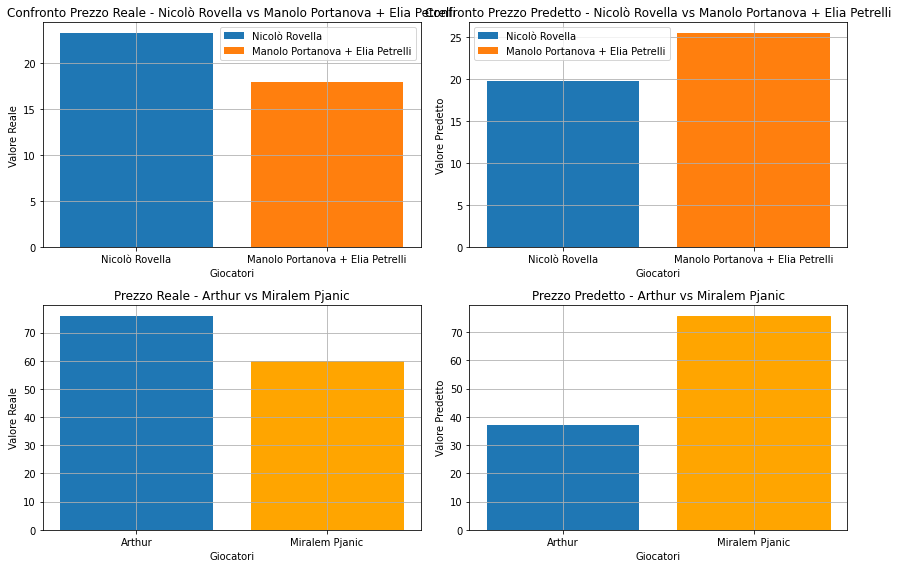

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtra i dati per i giocatori di interesse
players = ['Nicolò Rovella', 'Manolo Portanova', 'Elia Petrelli', 'Arthur', 'Miralem Pjanic', 'Danilo', 'João Cancelo']
filtered_df = merged_df[merged_df['player_name'].isin(players)]

# Creazione del plot
plt.figure(figsize=(12, 8))

# Confronto Prezzo Reale - Nicolò Rovella vs Manolo Portanova + Elia Petrelli
plt.subplot(2, 2, 1)
plt.bar('Nicolò Rovella', filtered_df[filtered_df['player_name'] == 'Nicolò Rovella']['Valore Reale'], label='Nicolò Rovella')
sum_portanova_petrelli_reale = filtered_df[filtered_df['player_name'].isin(['Manolo Portanova', 'Elia Petrelli'])]['Valore Reale'].sum()
plt.bar('Manolo Portanova + Elia Petrelli', sum_portanova_petrelli_reale, label='Manolo Portanova + Elia Petrelli')
plt.xlabel('Giocatori')
plt.ylabel('Valore Reale')
plt.title('Confronto Prezzo Reale - Nicolò Rovella vs Manolo Portanova + Elia Petrelli')
plt.legend()
plt.grid(True)

# Confronto Prezzo Predetto - Nicolò Rovella vs Manolo Portanova + Elia Petrelli
plt.subplot(2, 2, 2)
plt.bar('Nicolò Rovella', filtered_df[filtered_df['player_name'] == 'Nicolò Rovella']['Valore Predetto'], label='Nicolò Rovella')
sum_portanova_petrelli_predetto = filtered_df[filtered_df['player_name'].isin(['Manolo Portanova', 'Elia Petrelli'])]['Valore Predetto'].sum()
plt.bar('Manolo Portanova + Elia Petrelli', sum_portanova_petrelli_predetto, label='Manolo Portanova + Elia Petrelli')
plt.xlabel('Giocatori')
plt.ylabel('Valore Predetto')
plt.title('Confronto Prezzo Predetto - Nicolò Rovella vs Manolo Portanova + Elia Petrelli')
plt.legend()
plt.grid(True)

# Prezzo Reale - Arthur vs Miralem Pjanic
plt.subplot(2, 2, 3)
price_arthur = filtered_df[filtered_df['player_name'] == 'Arthur']['Valore Reale'].values[0]
price_pjanic = filtered_df[filtered_df['player_name'] == 'Miralem Pjanic']['Valore Reale'].values[0]
bars = plt.bar(['Arthur', 'Miralem Pjanic'], [price_arthur, price_pjanic])
bars[1].set_color('orange')  # Colora la barra di Miralem Pjanic di arancione
plt.xlabel('Giocatori')
plt.ylabel('Valore Reale')
plt.title('Prezzo Reale - Arthur vs Miralem Pjanic')
plt.grid(True)

# Prezzo Predetto - Arthur vs Miralem Pjanic
plt.subplot(2, 2, 4)
price_arthur = filtered_df[filtered_df['player_name'] == 'Arthur']['Valore Predetto'].values[0]
price_pjanic = filtered_df[filtered_df['player_name'] == 'Miralem Pjanic']['Valore Predetto'].values[0]
bars = plt.bar(['Arthur', 'Miralem Pjanic'], [price_arthur, price_pjanic])
bars[1].set_color('orange')  # Colora la barra di Miralem Pjanic di arancione
plt.xlabel('Giocatori')
plt.ylabel('Valore Predetto')
plt.title('Prezzo Predetto - Arthur vs Miralem Pjanic')
plt.grid(True)

# Impostazioni globali del plot
plt.tight_layout()

# Mostra il plot
plt.show()


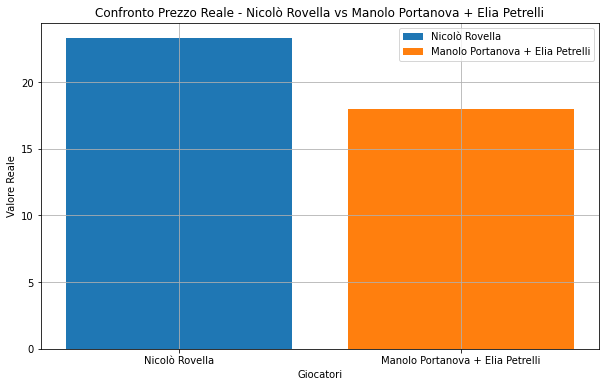

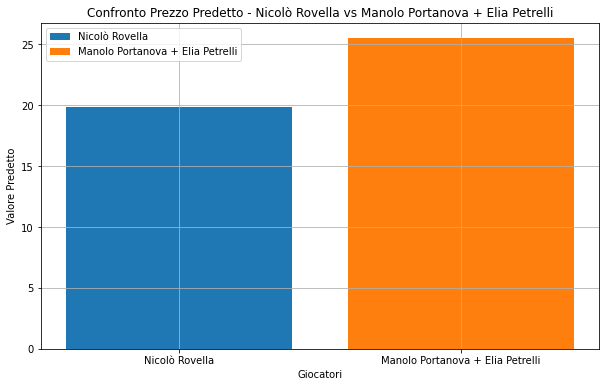

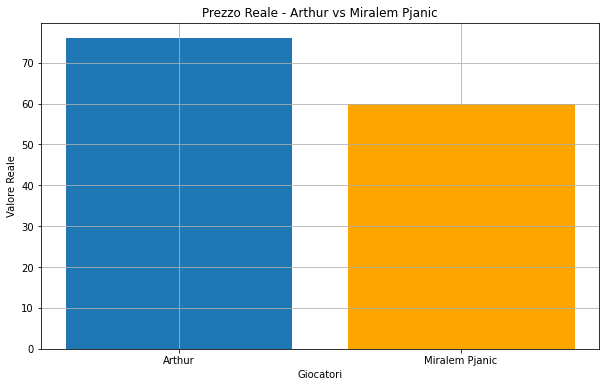

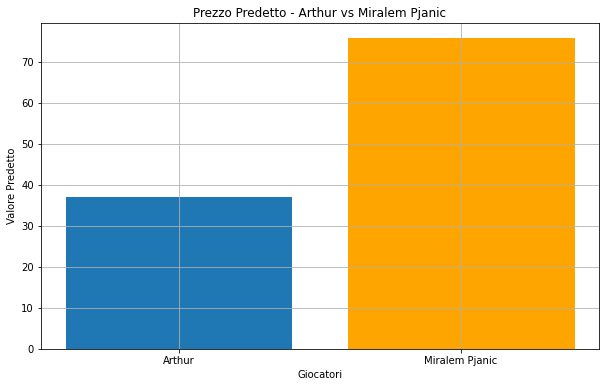

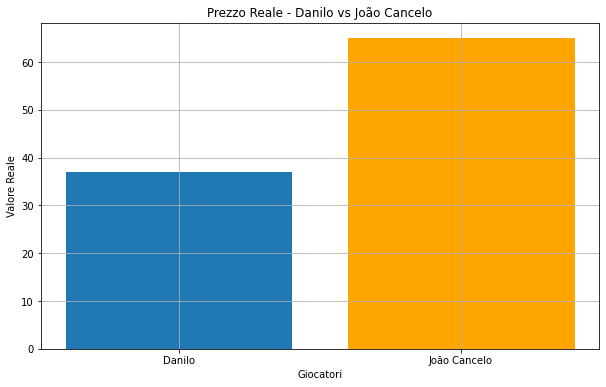

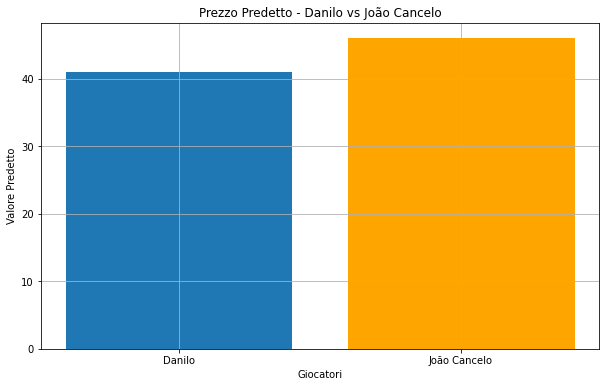

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtra i dati per i giocatori di interesse
players = ['Nicolò Rovella', 'Manolo Portanova', 'Elia Petrelli']
filtered_df = merged_df[merged_df['player_name'].isin(players)]

# Calcola la somma dei valori reali di Portanova e Petrelli
sum_portanova_petrelli = filtered_df[filtered_df['player_name'] != 'Nicolò Rovella']['Valore Reale'].sum()

# Crea il grafico a barre per il confronto dei prezzi reali
plt.figure(figsize=(10, 6))
plt.bar('Nicolò Rovella', filtered_df[filtered_df['player_name'] == 'Nicolò Rovella']['Valore Reale'], label='Nicolò Rovella')
plt.bar('Manolo Portanova + Elia Petrelli', sum_portanova_petrelli, label='Manolo Portanova + Elia Petrelli')
plt.xlabel('Giocatori')
plt.ylabel('Valore Reale')
plt.title('Confronto Prezzo Reale - Nicolò Rovella vs Manolo Portanova + Elia Petrelli')
plt.legend()
plt.grid(True)
plt.show()

# Calcola la somma dei valori predetti di Portanova e Petrelli
sum_portanova_petrelli = filtered_df[filtered_df['player_name'] != 'Nicolò Rovella']['Valore Predetto'].sum()

# Crea il grafico a barre per il confronto dei prezzi predetti
plt.figure(figsize=(10, 6))
plt.bar('Nicolò Rovella', filtered_df[filtered_df['player_name'] == 'Nicolò Rovella']['Valore Predetto'], label='Nicolò Rovella')
plt.bar('Manolo Portanova + Elia Petrelli', sum_portanova_petrelli, label='Manolo Portanova + Elia Petrelli')
plt.xlabel('Giocatori')
plt.ylabel('Valore Predetto')
plt.title('Confronto Prezzo Predetto - Nicolò Rovella vs Manolo Portanova + Elia Petrelli')
plt.legend()
plt.grid(True)
plt.show()

# Filtra i dati per i giocatori di interesse
players = ['Arthur', 'Miralem Pjanic']
filtered_df = merged_df[merged_df['player_name'].isin(players)]

# Prendi i valori dei prezzi reali di Arthur e Pjanic
price_arthur = filtered_df[filtered_df['player_name'] == 'Arthur']['Valore Reale'].values[0]
price_pjanic = filtered_df[filtered_df['player_name'] == 'Miralem Pjanic']['Valore Reale'].values[0]

# Crea il grafico a barre per il confronto dei prezzi reali
plt.figure(figsize=(10, 6))
bars = plt.bar(['Arthur', 'Miralem Pjanic'], [price_arthur, price_pjanic])
bars[1].set_color('orange')  # Colora la barra di Miralem Pjanic di arancione
plt.xlabel('Giocatori')
plt.ylabel('Valore Reale')
plt.title('Prezzo Reale - Arthur vs Miralem Pjanic')
plt.grid(True)
plt.show()

# Prendi i valori dei prezzi predetti di Arthur e Pjanic
price_arthur = filtered_df[filtered_df['player_name'] == 'Arthur']['Valore Predetto'].values[0]
price_pjanic = filtered_df[filtered_df['player_name'] == 'Miralem Pjanic']['Valore Predetto'].values[0]

# Crea il grafico a barre per il confronto dei prezzi predetti
plt.figure(figsize=(10, 6))
bars = plt.bar(['Arthur', 'Miralem Pjanic'], [price_arthur, price_pjanic])
bars[1].set_color('orange')  # Colora la barra di Miralem Pjanic di arancione
plt.xlabel('Giocatori')
plt.ylabel('Valore Predetto')
plt.title('Prezzo Predetto - Arthur vs Miralem Pjanic')
plt.grid(True)
plt.show()

# Filtra i dati per i giocatori di interesse
players = ['Danilo', 'João Cancelo']
filtered_df = merged_df[merged_df['player_name'].isin(players)]

# Prendi i valori dei prezzi reali di Danilo e João Cancelo
price_danilo = filtered_df[filtered_df['player_name'] == 'Danilo']['Valore Reale'].values[0]
price_cancelo = filtered_df[filtered_df['player_name'] == 'João Cancelo']['Valore Reale'].values[0]

# Crea il grafico a barre per il confronto dei prezzi reali
plt.figure(figsize=(10, 6))
bars = plt.bar(['Danilo', 'João Cancelo'], [price_danilo, price_cancelo])
bars[1].set_color('orange')  # Colora la barra di João Cancelo di arancione
plt.xlabel('Giocatori')
plt.ylabel('Valore Reale')
plt.title('Prezzo Reale - Danilo vs João Cancelo')
plt.grid(True)
plt.show()

# Prendi i valori dei prezzi predetti di Danilo e João Cancelo
price_danilo = filtered_df[filtered_df['player_name'] == 'Danilo']['Valore Predetto'].values[0]
price_cancelo = filtered_df[filtered_df['player_name'] == 'João Cancelo']['Valore Predetto'].values[0]

# Crea il grafico a barre per il confronto dei prezzi predetti
plt.figure(figsize=(10, 6))
bars = plt.bar(['Danilo', 'João Cancelo'], [price_danilo, price_cancelo])
bars[1].set_color('orange')  # Colora la barra di João Cancelo di arancione
plt.xlabel('Giocatori')
plt.ylabel('Valore Predetto')
plt.title('Prezzo Predetto - Danilo vs João Cancelo')
plt.grid(True)
plt.show()

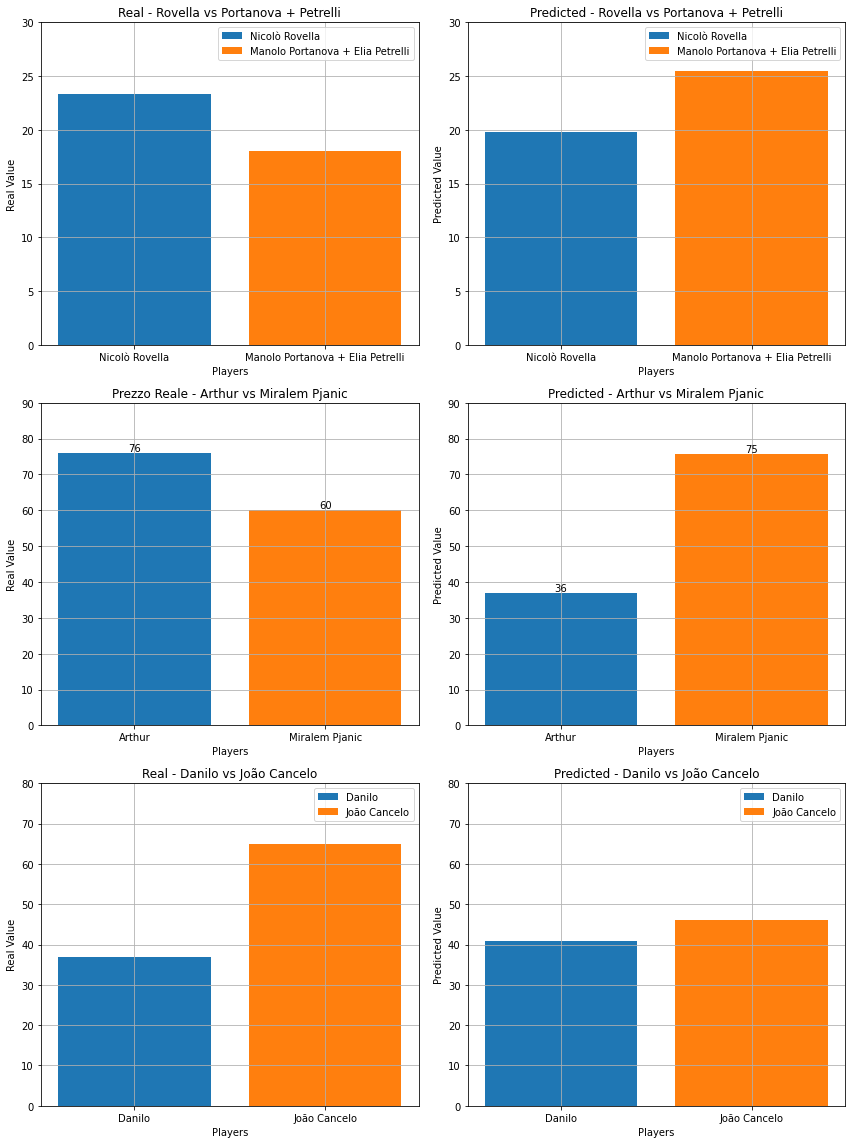

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtra i dati per i giocatori di interesse
players = ['Nicolò Rovella', 'Manolo Portanova', 'Elia Petrelli', 'Arthur', 'Miralem Pjanic', 'Danilo', 'João Cancelo']
filtered_df = merged_df[merged_df['player_name'].isin(players)]

# Creazione del plot
plt.figure(figsize=(12, 16))  # Increased vertical size

# Confronto Prezzo Reale - Nicolò Rovella vs Manolo Portanova + Elia Petrelli
plt.subplot(3, 2, 1)
plt.bar('Nicolò Rovella', filtered_df[filtered_df['player_name'] == 'Nicolò Rovella']['Valore Reale'], label='Nicolò Rovella')
sum_portanova_petrelli_reale = filtered_df[filtered_df['player_name'].isin(['Manolo Portanova', 'Elia Petrelli'])]['Valore Reale'].sum()
plt.bar('Manolo Portanova + Elia Petrelli', sum_portanova_petrelli_reale, label='Manolo Portanova + Elia Petrelli')
plt.xlabel('Players')
plt.ylabel('Real Value')
plt.title('Real - Rovella vs Portanova + Petrelli')
plt.legend()
plt.ylim(0, 30)
plt.grid(True)

# Confronto Prezzo Predetto - Nicolò Rovella vs Manolo Portanova + Elia Petrelli
plt.subplot(3, 2, 2)
plt.bar('Nicolò Rovella', filtered_df[filtered_df['player_name'] == 'Nicolò Rovella']['Valore Predetto'], label='Nicolò Rovella')
sum_portanova_petrelli_predetto = filtered_df[filtered_df['player_name'].isin(['Manolo Portanova', 'Elia Petrelli'])]['Valore Predetto'].sum()
plt.bar('Manolo Portanova + Elia Petrelli', sum_portanova_petrelli_predetto, label='Manolo Portanova + Elia Petrelli')
plt.xlabel('Players')
plt.ylabel('Predicted Value')
plt.title('Predicted - Rovella vs Portanova + Petrelli')
plt.legend()
plt.ylim(0, 30)
plt.grid(True)

# Prezzo Reale - Arthur vs Miralem Pjanic
plt.subplot(3, 2, 3)
price_arthur = filtered_df[filtered_df['player_name'] == 'Arthur']['Valore Reale'].values[0]
price_pjanic = filtered_df[filtered_df['player_name'] == 'Miralem Pjanic']['Valore Reale'].values[0]
bars = plt.bar(['Arthur', 'Miralem Pjanic'], [price_arthur, price_pjanic], color=['#1f77b4', '#ff7f0e'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('Players')
plt.ylabel('Real Value')
plt.title('Prezzo Reale - Arthur vs Miralem Pjanic')
plt.ylim(0, 90)
plt.grid(True)

# Prezzo Predetto - Arthur vs Miralem Pjanic
plt.subplot(3, 2, 4)
price_arthur = filtered_df[filtered_df['player_name'] == 'Arthur']['Valore Predetto'].values[0]
price_pjanic = filtered_df[filtered_df['player_name'] == 'Miralem Pjanic']['Valore Predetto'].values[0]
bars = plt.bar(['Arthur', 'Miralem Pjanic'], [price_arthur, price_pjanic], color=['#1f77b4', '#ff7f0e'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('Players')
plt.ylabel('Predicted Value')
plt.title('Predicted - Arthur vs Miralem Pjanic')
plt.ylim(0, 90)
plt.grid(True)

# Confronto Prezzo Reale - Danilo vs João Cancelo
plt.subplot(3, 2, 5)
plt.bar('Danilo', filtered_df[filtered_df['player_name'] == 'Danilo']['Valore Reale'], label='Danilo')
plt.bar('João Cancelo', filtered_df[filtered_df['player_name'] == 'João Cancelo']['Valore Reale'], label='João Cancelo')
plt.xlabel('Players')
plt.ylabel('Real Value')
plt.title('Real - Danilo vs João Cancelo')
plt.legend()
plt.ylim(0, 80)
plt.grid(True)

# Confronto Prezzo Predetto - Danilo vs João Cancelo
plt.subplot(3, 2, 6)
plt.bar('Danilo', filtered_df[filtered_df['player_name'] == 'Danilo']['Valore Predetto'], label='Danilo')
plt.bar('João Cancelo', filtered_df[filtered_df['player_name'] == 'João Cancelo']['Valore Predetto'], label='João Cancelo')
plt.xlabel('Players')
plt.ylabel('Predicted Value')
plt.title('Predicted - Danilo vs João Cancelo')
plt.legend()
plt.ylim(0, 80)
plt.grid(True)

# Impostazioni globali del plot
plt.tight_layout()

# Mostra il plot
plt.show()
